In [27]:
import pandas as pd
from pathlib import Path
import parse
from collections import deque

base_path = Path("./output")
timing_fmt_matcher = parse.compile("lat{latency:d}_var{variance:d}")
exp_fmt_matcher = parse.compile("{model_name}_{rep:d}_of_{total_reps:d}")

dfs = deque()

for exp_dir in base_path.iterdir():
    res = timing_fmt_matcher.parse(exp_dir.name)
    one_way_latency = res["latency"]
    one_way_variance = res["variance"]
    lat_var = f"lat{one_way_latency:04d}ms_var{one_way_variance:04d}ms"
    for rep_dir in exp_dir.iterdir():
        res = exp_fmt_matcher.parse(rep_dir.name)
        model = res["model_name"]
        rep = res["rep"]
        
        steps_file = rep_dir / "client.steps.csv"
        steps_csv = pd.read_csv(steps_file)
        
        steps_csv["one_way_latency"] = one_way_latency
        steps_csv["one_way_variance"] = one_way_variance
        steps_csv["model"] = model
        steps_csv["rep"] = rep
        steps_csv["lat_var"] = lat_var
        
        dfs.append(steps_csv)
    
data = pd.concat(dfs, ignore_index=True)
data["task_duration"] = data.groupby(["one_way_latency", "one_way_variance", "model", "rep"])["step_duration"].cumsum()
lat_vars = pd.CategoricalDtype(sorted(data["lat_var"].unique()), ordered=True)
data["lat_var"] = data["lat_var"].astype(lat_vars)
data

,step_number,step_start,step_start_monotonic,step_end,step_end_monotonic,first_frame_monotonic,last_frame_monotonic,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,one_way_latency,one_way_variance,model,rep,lat_var,task_duration
0,0,1.714893e+09,18831.647282,1.714893e+09,18832.471641,18831.647778,18831.647778,0.823862,0.000000,0.824358,0.824358,0.000496,1,50,10,first-order-median,6,lat0050ms_var0010ms,0.824358
1,1,1.714893e+09,18832.471641,1.714893e+09,18838.289834,18832.472801,18837.766159,0.523675,5.230947,5.818193,0.587246,0.063572,35,50,10,first-order-median,6,lat0050ms_var0010ms,6.642552
2,2,1.714893e+09,18838.289834,1.714893e+09,18844.102986,18838.290689,18843.597177,0.505809,5.230947,5.813152,0.582205,0.076396,21,50,10,first-order-median,6,lat0050ms_var0010ms,12.455704
3,3,1.714893e+09,18844.102986,1.714893e+09,18850.042130,18844.103835,18849.509643,0.532487,5.230947,5.939144,0.708197,0.175710,23,50,10,first-order-median,6,lat0050ms_var0010ms,18.394847
4,4,1.714893e+09,18850.042130,1.714893e+09,18855.849873,18850.043041,18855.402146,0.447727,5.230947,5.807743,0.576796,0.129069,21,50,10,first-order-median,6,lat0050ms_var0010ms,24.202590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,46,1.714926e+09,36984.128217,1.714926e+09,36989.111425,36984.129850,36988.287767,0.823658,4.049000,4.983209,0.934209,0.110550,8,100,20,legacy,6,lat0100ms_var0020ms,229.408519
10196,47,1.714926e+09,36989.111425,1.714926e+09,36994.062064,36989.113307,36993.351871,0.710192,4.049000,4.950639,0.901639,0.191446,12,100,20,legacy,6,lat0100ms_var0020ms,234.359157
10197,48,1.714926e+09,36994.062064,1.714926e+09,36999.003326,36994.063809,36998.354395,0.648931,4.049000,4.941262,0.892262,0.243331,9,100,20,legacy,6,lat0100ms_var0020ms,239.300419
10198,49,1.714926e+09,36999.003326,1.714926e+09,37003.810064,36999.004821,37003.181881,0.628183,4.049000,4.806738,0.757738,0.129555,10,100,20,legacy,6,lat0100ms_var0020ms,244.107157


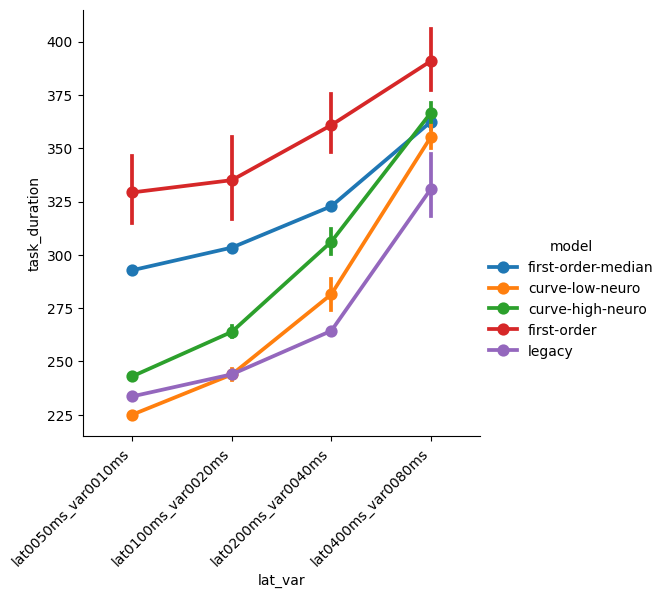

,step_number,step_start,step_start_monotonic,step_end,step_end_monotonic,first_frame_monotonic,last_frame_monotonic,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,one_way_latency,one_way_variance,model,rep,lat_var,task_duration
50,50,1.714893e+09,19118.481414,1.714893e+09,19124.203962,19118.482120,19123.724924,0.479038,5.230947,5.722548,0.491601,0.012563,21,50,10,first-order-median,6,lat0050ms_var0010ms,292.556680
101,50,1.714896e+09,22327.669693,1.714896e+09,22331.886819,22327.670509,22331.407887,0.478933,3.635393,4.217126,0.581733,0.102800,18,50,10,curve-low-neuro,8,lat0050ms_var0010ms,224.743989
152,50,1.714895e+09,20715.976435,1.714895e+09,20720.541426,20715.977176,20720.044183,0.497243,4.042189,4.564991,0.522803,0.025560,20,50,10,curve-high-neuro,7,lat0050ms_var0010ms,242.151506
203,50,1.714888e+09,13532.302081,1.714888e+09,13539.630577,13532.303107,13539.138282,0.492296,6.830226,7.328496,0.498271,0.005975,31,50,10,first-order,2,lat0050ms_var0010ms,342.709307
254,50,1.714892e+09,18046.340869,1.714892e+09,18050.991989,18046.341871,18050.476652,0.515337,4.122766,4.651120,0.528354,0.013017,12,50,10,curve-high-neuro,5,lat0050ms_var0010ms,244.808993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,1.714927e+09,38136.041799,1.714927e+09,38140.779333,38136.043167,38140.119059,0.660274,3.886831,4.737533,0.850702,0.190428,10,100,20,curve-low-neuro,6,lat0100ms_var0020ms,243.365241
10046,50,1.714931e+09,42063.453902,1.714931e+09,42069.369889,42063.454934,42068.774123,0.595766,5.287225,5.915987,0.628762,0.032996,13,100,20,curve-high-neuro,9,lat0100ms_var0020ms,271.310952
10097,50,1.714933e+09,43716.595653,1.714933e+09,43721.209856,43716.596676,43720.565852,0.644003,3.814112,4.614202,0.800090,0.156086,9,100,20,curve-low-neuro,10,lat0100ms_var0020ms,241.126395
10148,50,1.714925e+09,35368.576379,1.714925e+09,35373.172907,35368.577546,35372.553186,0.619721,3.806631,4.596528,0.789898,0.170176,9,100,20,curve-low-neuro,4,lat0100ms_var0020ms,252.452494


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

last_step_data = data[data["step_number"] == data["step_number"].max()]

fg = sns.catplot(kind="point", data=last_step_data, x="lat_var", y="task_duration", hue="model")
for ax in fg.axes.flat:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

plt.show()
last_step_data

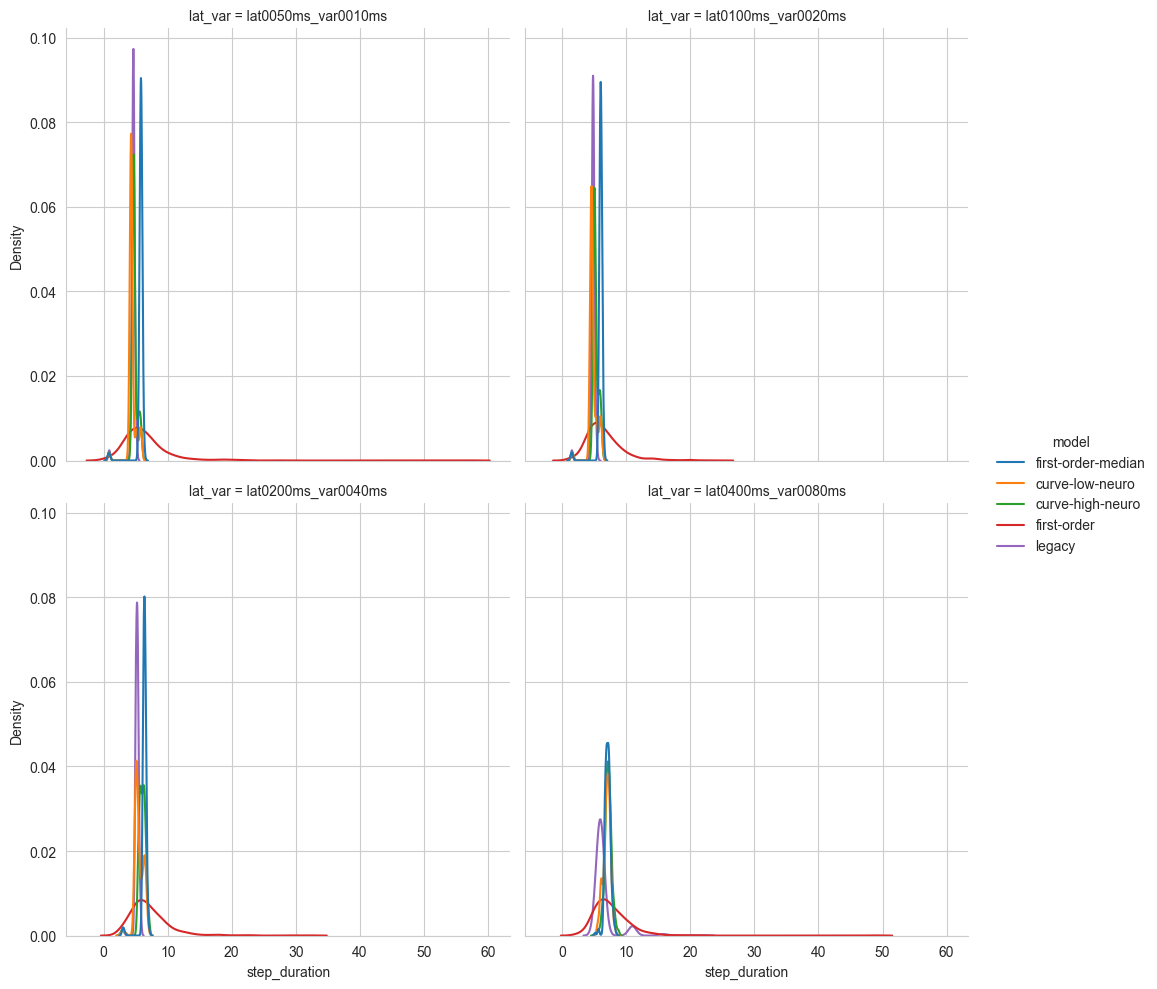

In [67]:
fg = sns.displot(data=data, kind="kde", x="step_duration", hue="model", col="lat_var", col_wrap=2, legend=True)
# fg.set(xscale="log")
plt.show()

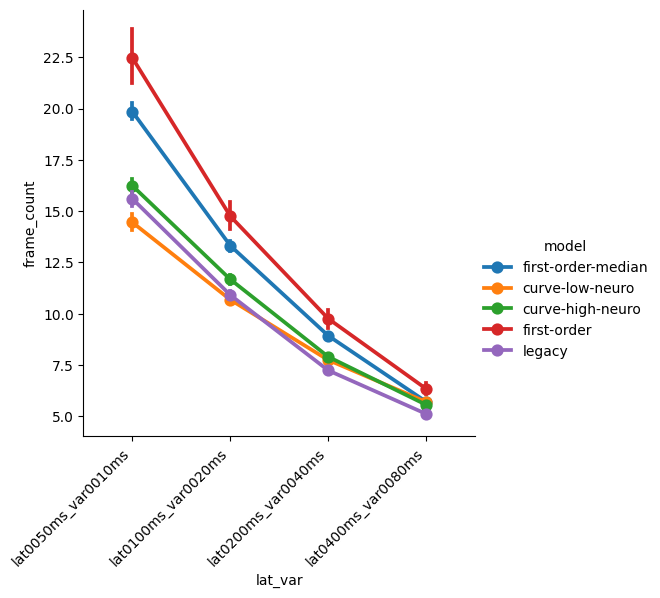

In [66]:
fg = sns.catplot(kind="point", data=data, x="lat_var", y="frame_count", hue="model")
for ax in fg.axes.flat:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show()